# Impact of Social Media on Students
By: Sushant Bharadwaj Kagolanu

In [1]:
# Required libraries for the EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Introduction
CIS 4526: Foundations of Machine Learning 
Project 1 - Exploratory Data Analysis (EDA)

For this project, I selected the "Students' Social Media Addiction" dataset from Kaggle's datasets. You can find the details of this dataset with the link: https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships

In this project, I will:

* Present and describe the dataset
* Explore the surface level findings of the dataset
* Clean up the dataset
* Explore the data characteristics / underlying structures
* Conclude my findings from the analysis

## Presenting the Dataset
The dataset is a cross-country survey that explores the students' presence on social media and how it affects their academic performance, health, relationships, and overall delves into how they use social media. The data was collected via a temporary online survey administered in Q1 2025. The data collection process ensured that the students remained anonymous to reduce as much self-report bias as possible, the data does not contain duplicates of multiple entries by the same student code, and that the data is slightly validated in terms of range checks and filling required fields. I decided to work with this dataset since I am a university student in a relationship, who spends a large portion of their time on social media. I would like to study this dataset to better grasp and be aware of the impacts of social media as a direct target audience of this dataset. Although the dataset contains a few string fields, there are various numerical fields that I would like to analyze from the dataset. Furthermore, the structure of the dataset is quite beginner-friendly as it is not in an esoteric format. The dataset is retrieved from the kaggle page. However, the .csv file of the data is downloaded locally for simplicity. 

In [85]:
# Loading the data
datasetSocial = pd.read_csv(("Students Social Media Addiction.csv"), index_col = 0)
# The index_col is set to the first field as every Student_ID is unique and can be used as a primary field.

## Exploring the Dataset
As the dataset is loaded, we can now understand more about the dataset we are working with by looking into the shape of the data. 

In [86]:
datasetSocial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 1 to 705
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Country                       705 non-null    object 
 4   Avg_Daily_Usage_Hours         705 non-null    float64
 5   Most_Used_Platform            705 non-null    object 
 6   Affects_Academic_Performance  705 non-null    object 
 7   Sleep_Hours_Per_Night         705 non-null    float64
 8   Mental_Health_Score           705 non-null    int64  
 9   Relationship_Status           705 non-null    object 
 10  Conflicts_Over_Social_Media   705 non-null    int64  
 11  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 71.6+ KB


In [87]:
datasetSocial.shape

(705, 12)

In [88]:
datasetSocial.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [89]:
datasetSocial.tail()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


### Initial Findings on the Structure of the Data
* It has 12 columns and 705 lines. Each column title is a variable. Thus, the data is organized in the wide format.
* 6 variables out of 12 fields are numerical ones, 2 float (float64) values and 4 integer (int64) values. The rest of the data fields are categorical as they are string objects.
* All of the fields have 705 non-null values, implying that there are no missing fields. 
* All the numerical fields have specifcally different ranges within the dataset.
* There are certain categorical fields with an only boolean outcome, such as "male" and "female" for "Gender" field. This implies that the fields can easily be transformed into numerical form. As there is only a limited number of categories within other fields, this implies that we could use one-hot encoding if we want to work with categorical data.
  
### Potential Questions Suggested by the Exploration
* What variables affect the mental health score?
* If women and men use social media with roughly the same amount of usage or online presence, would the mental health score, academic performance, relationship status, and sleep be different? Simply put, does social media affect specific genders differently? 
* How difficult is it for a student to have good health, be academically successful, and maintain a relationship while having an online presence?

## Checking for Missing and Anomalous Data Values
We must check if the data can be operable to make statistical analysis.

In [90]:
datasetSocial.isnull().any() # Check for null values

Age                             False
Gender                          False
Academic_Level                  False
Country                         False
Avg_Daily_Usage_Hours           False
Most_Used_Platform              False
Affects_Academic_Performance    False
Sleep_Hours_Per_Night           False
Mental_Health_Score             False
Relationship_Status             False
Conflicts_Over_Social_Media     False
Addicted_Score                  False
dtype: bool

In [91]:
datasetSocial.isna().any() # Check for nan, na and none types.

Age                             False
Gender                          False
Academic_Level                  False
Country                         False
Avg_Daily_Usage_Hours           False
Most_Used_Platform              False
Affects_Academic_Performance    False
Sleep_Hours_Per_Night           False
Mental_Health_Score             False
Relationship_Status             False
Conflicts_Over_Social_Media     False
Addicted_Score                  False
dtype: bool

There are no rows with null or faulty values. Before we go ahead with the statistical analysis, we must verify that the dataset is actually clean.

## Data Cleaning
Before intervening upon the dataset, we must verify that the values of every field are validated. The categorical fields can be checked to see if the inputted strings are valid to the suggested categories. For the numerical values, there is no need to specifically validate the data since we will be looking into the statistics and plots of the data during the exploration of data characteristics / underlying structures.

In [92]:
datasetSocial.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [93]:
datasetSocial.Academic_Level.unique()

array(['Undergraduate', 'Graduate', 'High School'], dtype=object)

In [94]:
datasetSocial.Country.unique()

array(['Bangladesh', 'India', 'USA', 'UK', 'Canada', 'Australia',
       'Germany', 'Brazil', 'Japan', 'South Korea', 'France', 'Spain',
       'Italy', 'Mexico', 'Russia', 'China', 'Sweden', 'Norway',
       'Denmark', 'Netherlands', 'Belgium', 'Switzerland', 'Austria',
       'Portugal', 'Greece', 'Ireland', 'New Zealand', 'Singapore',
       'Malaysia', 'Thailand', 'Vietnam', 'Philippines', 'Indonesia',
       'Taiwan', 'Hong Kong', 'Turkey', 'Israel', 'UAE', 'Egypt',
       'Morocco', 'South Africa', 'Nigeria', 'Kenya', 'Ghana',
       'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Ecuador',
       'Uruguay', 'Paraguay', 'Bolivia', 'Costa Rica', 'Panama',
       'Jamaica', 'Trinidad', 'Bahamas', 'Iceland', 'Finland', 'Poland',
       'Romania', 'Hungary', 'Czech Republic', 'Slovakia', 'Croatia',
       'Serbia', 'Slovenia', 'Bulgaria', 'Estonia', 'Latvia', 'Lithuania',
       'Ukraine', 'Moldova', 'Belarus', 'Kazakhstan', 'Uzbekistan',
       'Kyrgyzstan', 'Tajikistan', 'A

In [95]:
datasetSocial.Most_Used_Platform.unique()

array(['Instagram', 'Twitter', 'TikTok', 'YouTube', 'Facebook',
       'LinkedIn', 'Snapchat', 'LINE', 'KakaoTalk', 'VKontakte',
       'WhatsApp', 'WeChat'], dtype=object)

In [96]:
datasetSocial.Affects_Academic_Performance.unique()

array(['Yes', 'No'], dtype=object)

In [97]:
datasetSocial.Relationship_Status.unique()

array(['In Relationship', 'Single', 'Complicated'], dtype=object)

After reviewing the unique values of each category, it is safe to conclude that the values are validated and clean. There are no duplicated strings, strings that are incorrectly contextual, and there are no anomalies with the data. Before we proceed with the statistical analysis, we must consider the removal of unnecessary data and the transformation of data to better suit our needs.

In [98]:
datasetSocial.to_csv('studentsSocialMedia_cleaned.csv') # Create a copy
datasetSocialClean = pd.read_csv('studentsSocialMedia_cleaned.csv', index_col = 0)
datasetSocialClean.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


Now that we made a copy of the dataset, we can now transform and modify the data that best fits our EDA.

In [99]:
datasetSocialClean.Most_Used_Platform.head(10)

Student_ID
1     Instagram
2       Twitter
3        TikTok
4       YouTube
5      Facebook
6     Instagram
7      LinkedIn
8      Snapchat
9        TikTok
10    Instagram
Name: Most_Used_Platform, dtype: object

The use of specific platforms have little to no implication with our EDA as the main focus is on the overall impact of social media presence on students. We do not need to analyze with this data field.

In [100]:
datasetSocialClean.drop('Most_Used_Platform', axis = 1, inplace = True) # Drop the collumn
datasetSocialClean.to_csv('studentsSocialMedia_cleaned.csv', index=False) # Save changes to the cleaned .csv file
datasetSocialClean.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,
1,19,Female,Undergraduate,Bangladesh,5.2,Yes,6.5,6,In Relationship,3,8
2,22,Male,Graduate,India,2.1,No,7.5,8,Single,0,3
3,20,Female,Undergraduate,USA,6.0,Yes,5.0,5,Complicated,4,9
4,18,Male,High School,UK,3.0,No,7.0,7,Single,1,4
5,21,Male,Graduate,Canada,4.5,Yes,6.0,6,In Relationship,2,7


The need for analyzing countries could provide helpful insights regarding the severity of social media addiction for each country.

In [101]:
datasetSocialClean['Country'].value_counts()

Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64

However, there are not enough entries for each country to have reliable data and draw reasonable conclusions regarding the impact of social media on every region. There are too many countries with minimal entries. Therefore, we have no need to use this field in our EDA.

In [102]:
datasetSocialClean.drop('Country', axis = 1, inplace = True) # Drop the collumn
datasetSocialClean.to_csv('studentsSocialMedia_cleaned.csv', index=False) # Save changes to the cleaned .csv file
datasetSocialClean.head()

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,
1,19,Female,Undergraduate,5.2,Yes,6.5,6,In Relationship,3,8
2,22,Male,Graduate,2.1,No,7.5,8,Single,0,3
3,20,Female,Undergraduate,6.0,Yes,5.0,5,Complicated,4,9
4,18,Male,High School,3.0,No,7.0,7,Single,1,4
5,21,Male,Graduate,4.5,Yes,6.0,6,In Relationship,2,7


The "Age" and "Academic_Level" fields delve into the same source of information. 

In [103]:
datasetSocialClean['Age'].value_counts()

Age
20    165
19    163
21    156
22    147
23     34
24     26
18     14
Name: count, dtype: int64

As the data primarily focuses on students nonetheless, it becomes hard to draw conclusions about specific age sub-groups within the range of 18 and 24. The number of entries for each age is not equal nor is it enough to draw reliable conclusions. Furthermore, seperating conclusions for the academic level becomes complicated since the correlations with the field will lead to the phenomenon within Sympson's paradox. The amount of work every student does is different, their enrolled university, their enrolled major, full-time or part-time, etc. Without more information about the conditional sub-fields, the analysis on academic level and age will have extremely misleading results. Therefore, we do not need to draw conclusions with these fields. 

In [104]:
datasetSocialClean.drop(['Age', 'Academic_Level'], axis = 1, inplace = True) # Drop the collumns
datasetSocialClean.to_csv('studentsSocialMedia_cleaned.csv', index=False) # Save changes to the cleaned .csv file
datasetSocialClean.head()

,Gender,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,
1,Female,5.2,Yes,6.5,6,In Relationship,3,8
2,Male,2.1,No,7.5,8,Single,0,3
3,Female,6.0,Yes,5.0,5,Complicated,4,9
4,Male,3.0,No,7.0,7,Single,1,4
5,Male,4.5,Yes,6.0,6,In Relationship,2,7


The remaining categorical fields are: "Gender", "Affects_Academic_Performance", and "Relationship_Status"

In [105]:
datasetSocialClean['Gender'].value_counts()

Gender
Female    353
Male      352
Name: count, dtype: int64

In [106]:
datasetSocialClean['Affects_Academic_Performance'].value_counts()

Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

In [107]:
datasetSocialClean['Relationship_Status'].value_counts()

Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64

The "Gender" and "Affects_Academic_Performance" fields have a boolean outcome, signifiable with True and False. One-hot encoding can be applied to transform categorical data into numerical data. As these fields have a boolean outcome, the amount of dimensionality of the data will not increase. Simply put, the number of fields will not increase since the implication of the "Is_Male" field being True means that the hypothetical "Is_Female" field is False. Therefore, we only require one boolean field to represent the same data. However, the same cannot be said about the "Relationship_Status" field.

In [108]:
print(32 / 705)  # Calculate the percentage of students with a complicated relationship status

0.04539007092198582


There are 705 total entries, and 32 of them have a complicated relationship status. Only 4.5% of the data follows this category. If we use one-hot encoding for this field, a binary bit must be reserved for each category since the result of one boolean does not imply anything about the boolean values of the other two categories, unless if it is True. Nonetheless, three boolean fields will be required to represent this categorical data field, vastly increasing the amount of dimensions. Moreover, drawing conclusions regarding the complicated relationship status could lead to the Sympson's paradox as we can not draw any reasonings about whether their relationship is haulted due to work, or whether there is distance, or a medical emergency, or a situationship. As this only covers 4.5% of the data, we can delete the entries of this category to maintain reliability of data and to keep the number of dimensions from one-hot encoding as minimal as possible.

In [109]:
# One-hot encode categorical columns for correlation analysis
datasetSocialClean = datasetSocialClean[datasetSocialClean['Relationship_Status'] != 'Complicated'] # Remove 'Complicated' relationship status
categorical_cols = ['Gender', 'Affects_Academic_Performance', 'Relationship_Status']
datasetSocialClean = pd.get_dummies(datasetSocialClean, columns = categorical_cols, drop_first = True) # One-hot encoding the categorical columns
datasetSocialClean.to_csv('studentsSocialMedia_cleaned.csv', index=False) # Save changes to the cleaned .csv file
datasetSocialClean.head()

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Affects_Academic_Performance_Yes,Relationship_Status_Single
Student_ID,,,,,,,,
1,5.2,6.5,6,3,8,False,True,False
2,2.1,7.5,8,0,3,True,False,True
4,3.0,7.0,7,1,4,True,False,True
5,4.5,6.0,6,2,7,True,True,False
7,1.5,8.0,9,0,2,True,False,True


In [110]:
datasetSocialClean.shape # Check the shape of the cleaned dataset

(673, 8)

In [111]:
print(705 - 32) # Number of students with a non-complicated relationship status

673


The data now has 673 entries with 8 columns, without any entries of complicated relationship status. Moreover, all the categorial data is now converted into numerical data. The dataset is now cleaned and ready for further statistical analysis.

## Exploring the Data Structures and Analysis
Description of each data field modified from Kaggle:
* Student_ID: A unique integer set for every student, used for indexing as a primary key.

* Gender_Male: A boolean that retrieves True if the student is a male. Else, False for female.

* Avg_Daily_Usage_Hours: "The average number of hours per day the student spends on social media platforms, calculated from self-reported weekday and weekend usage estimates."

* Affects_Academic_Performance_Yes: A boolean that retrieves True if the student perceives their social media use as having a negative impact on their academic performance.

* Sleep_Hours_Per_Night: "The student's average nightly sleep duration in hours, provided to investigate correlations between screen time and sleep quality/quantity."

* Mental_Health_Score: "A self-rated integer from 1 (poor) to 10 (excellent) indicating overall mental well-being, allowing assessment of potential associations with social media habits."

* Relationship_Status_Single: A boolean that retrieves True if the student is single. Else, False for being in a relationship.

* Conflicts_Over_Social_Media: "The number of arguments or disagreements the student reports having had with family, friends, or partners due to their social media use, serving as a proxy for social friction."

* Addicted_Score: "A composite score from 1 (low addiction) to 10 (high addiction) based on a standardized survey scale (e.g., Bergen Social Media Addiction Scale), quantifying the degree of problematic usage."

The cleaned data is in wide format as we use the Student_ID as index, which are unique values. 

Now, let us start with looking into the description of this cleaned dataset.

In [112]:
datasetSocialClean.describe() # Get a statistical summary of the dataset

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,673.000000,673.000000,673.000000,673.000000,673.000000
mean,4.928083,6.915007,6.240713,2.841010,6.408618
std,1.260137,1.122536,1.105320,0.952744,1.585195
min,1.500000,3.800000,4.000000,0.000000,2.000000
25%,4.100000,6.100000,5.000000,2.000000,5.000000
50%,4.800000,7.000000,6.000000,3.000000,7.000000
75%,5.800000,7.800000,7.000000,4.000000,8.000000
max,8.500000,9.600000,9.000000,5.000000,9.000000


With this dataset description, there are minimal changes between the mean and the median (50% quartile). This implies that there are not many extreme outliers in our dataset that must be verified to be cleaned. Furthermore, the min and max values stay within the expected range of input entries. Let us now look at the box plot and histogram of every variable and deduce more information regarding data summary and outliers.

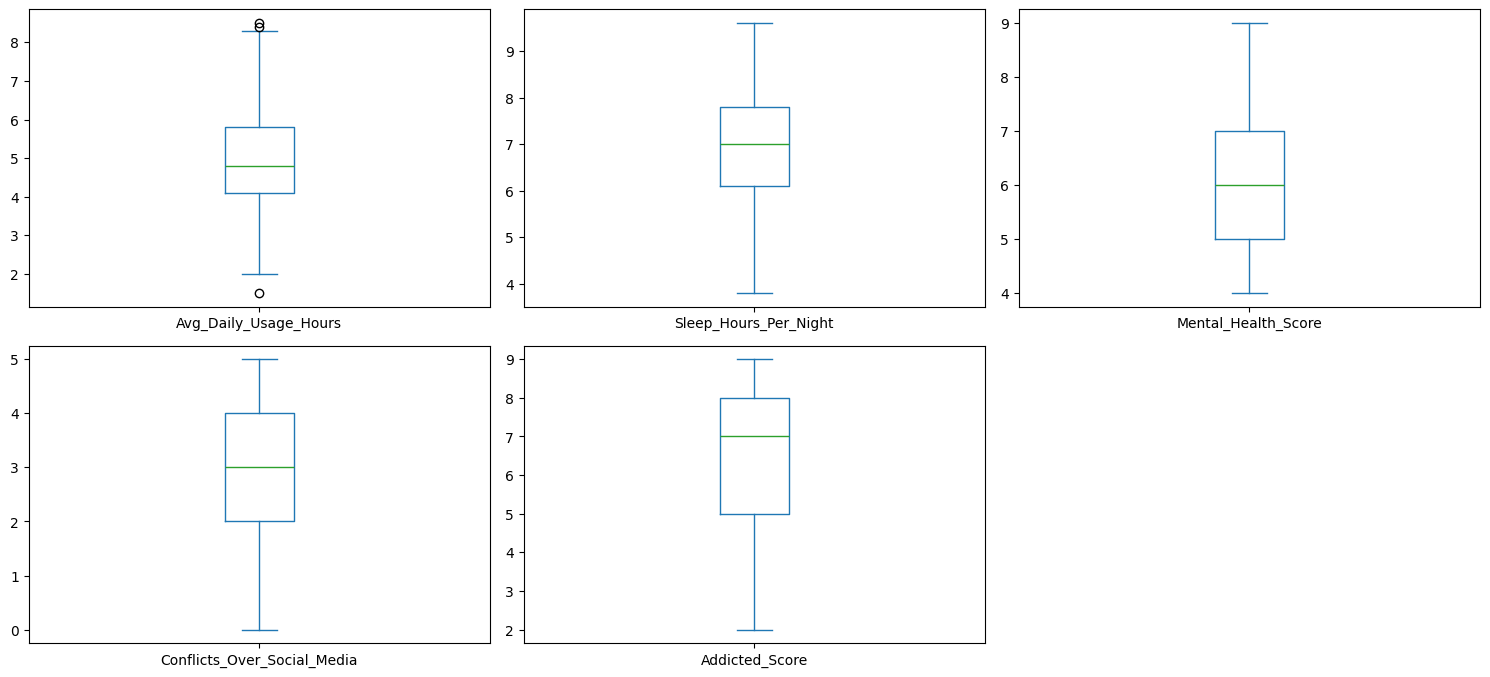

In [113]:
# Create box plots for every variable in the cleaned dataset
datasetSocialClean.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

The box plots are created for all the numerical variables except for the boolean fields. If the boolean fields are used in the box plot or similar graphings, it will display the information in terms of probability of attaining True or False rather than a discrete output. Nonetheless, there are no noticable outliers in any box plot except for the average daily usage (hours) field. 

In [117]:
# Show the row with the highest Avg_Daily_Usage_Hours
highest_usage = datasetSocialClean.loc[datasetSocialClean['Avg_Daily_Usage_Hours'].idxmax()]
print("Highest Avg_Daily_Usage_Hours record:")
print(highest_usage)

# Show the row with the lowest Avg_Daily_Usage_Hours
lowest_usage = datasetSocialClean.loc[datasetSocialClean['Avg_Daily_Usage_Hours'].idxmin()]
print("\nLowest Avg_Daily_Usage_Hours record:")
print(lowest_usage)

Highest Avg_Daily_Usage_Hours record:
Avg_Daily_Usage_Hours                 8.5
Sleep_Hours_Per_Night                 3.8
Mental_Health_Score                     5
Conflicts_Over_Social_Media             4
Addicted_Score                          9
Gender_Male                         False
Affects_Academic_Performance_Yes     True
Relationship_Status_Single          False
Name: 497, dtype: object

Lowest Avg_Daily_Usage_Hours record:
Avg_Daily_Usage_Hours                 1.5
Sleep_Hours_Per_Night                 8.0
Mental_Health_Score                     9
Conflicts_Over_Social_Media             0
Addicted_Score                          2
Gender_Male                          True
Affects_Academic_Performance_Yes    False
Relationship_Status_Single           True
Name: 7, dtype: object


Getting a grasp of the overall data entry of two extreme outliers being the maximum and the minimum. We should include these outliers since the values are still within the range of expected values of around 0 to 10 hours. Furthermore, the data makes sense in the idea of correlation. For the highest average daily usage of social media, their addiction score is extremely high. They also get less sleep because of the prolonged use of social media applications. Whereas for the lowest average daily usage of social media, their addiction score is extremely low and get plenty of rest. As the overall correlation of variables make sense, these outliers must be included within the dataset to retain accurate information regarding correlations between variables. We will look into the correlations later.

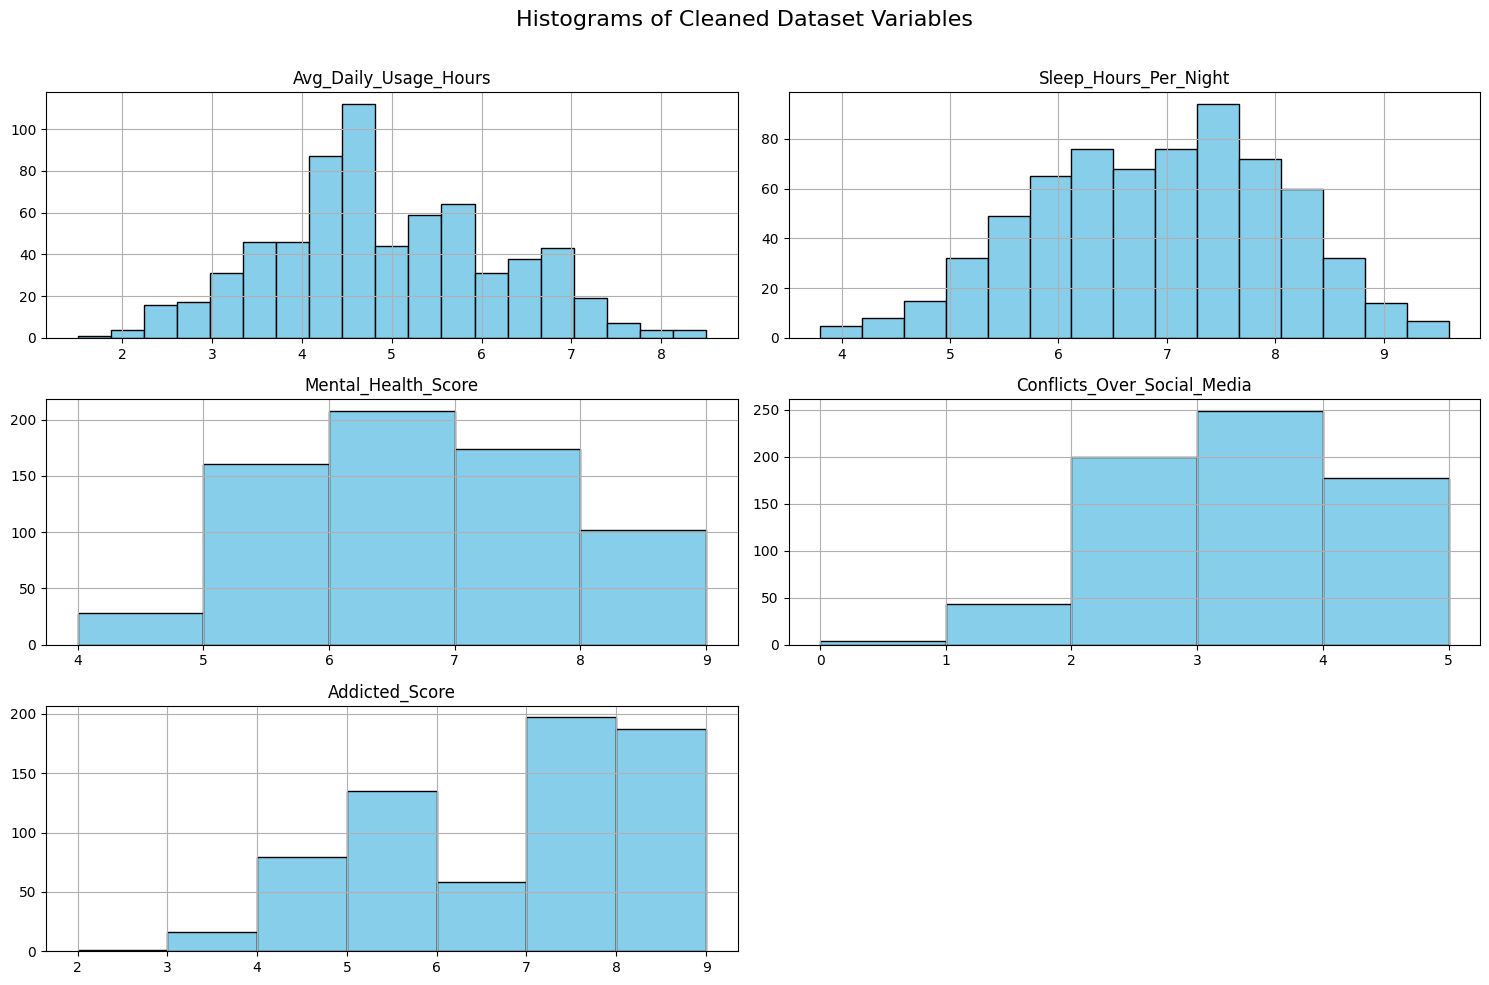

In [114]:
datasetSocialClean.hist(bins="auto", figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Cleaned Dataset Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

With a quick glance at the histogram, the majority of the dataset stays on social media for less than 5 hours on average daily, get more than 7 hours of sleep, have a decent mental score of around 6, generally have many conflicts on social media, and admit to being highly addicted to the applications. Although the average usage of social media and the amount of sleep are somewhat contradictory to the implication of having a high addicted score, this may be the result of being a student who tries to balance academic work while prioritizing social media presence over the days. Now let's look at the correlations and make connections. 

In [115]:
datasetSocialClean.corr()  # Display the correlation matrix

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Affects_Academic_Performance_Yes,Relationship_Status_Single
Avg_Daily_Usage_Hours,1.000000,-0.809007,-0.798131,0.799590,0.832545,-0.060804,0.659190,-0.001869
Sleep_Hours_Per_Night,-0.809007,1.000000,0.705534,-0.676216,-0.761783,0.035349,-0.623397,0.065665
Mental_Health_Score,-0.798131,0.705534,1.000000,-0.889171,-0.944586,0.034654,-0.806686,-0.044664
Conflicts_Over_Social_Media,0.799590,-0.676216,-0.889171,1.000000,0.932813,-0.076228,0.831790,0.072684
Addicted_Score,0.832545,-0.761783,-0.944586,0.932813,1.000000,-0.036967,0.867734,0.036178
Gender_Male,-0.060804,0.035349,0.034654,-0.076228,-0.036967,1.000000,-0.011243,-0.037735
Affects_Academic_Performance_Yes,0.659190,-0.623397,-0.806686,0.831790,0.867734,-0.011243,1.000000,0.176220
Relationship_Status_Single,-0.001869,0.065665,-0.044664,0.072684,0.036178,-0.037735,0.176220,1.000000


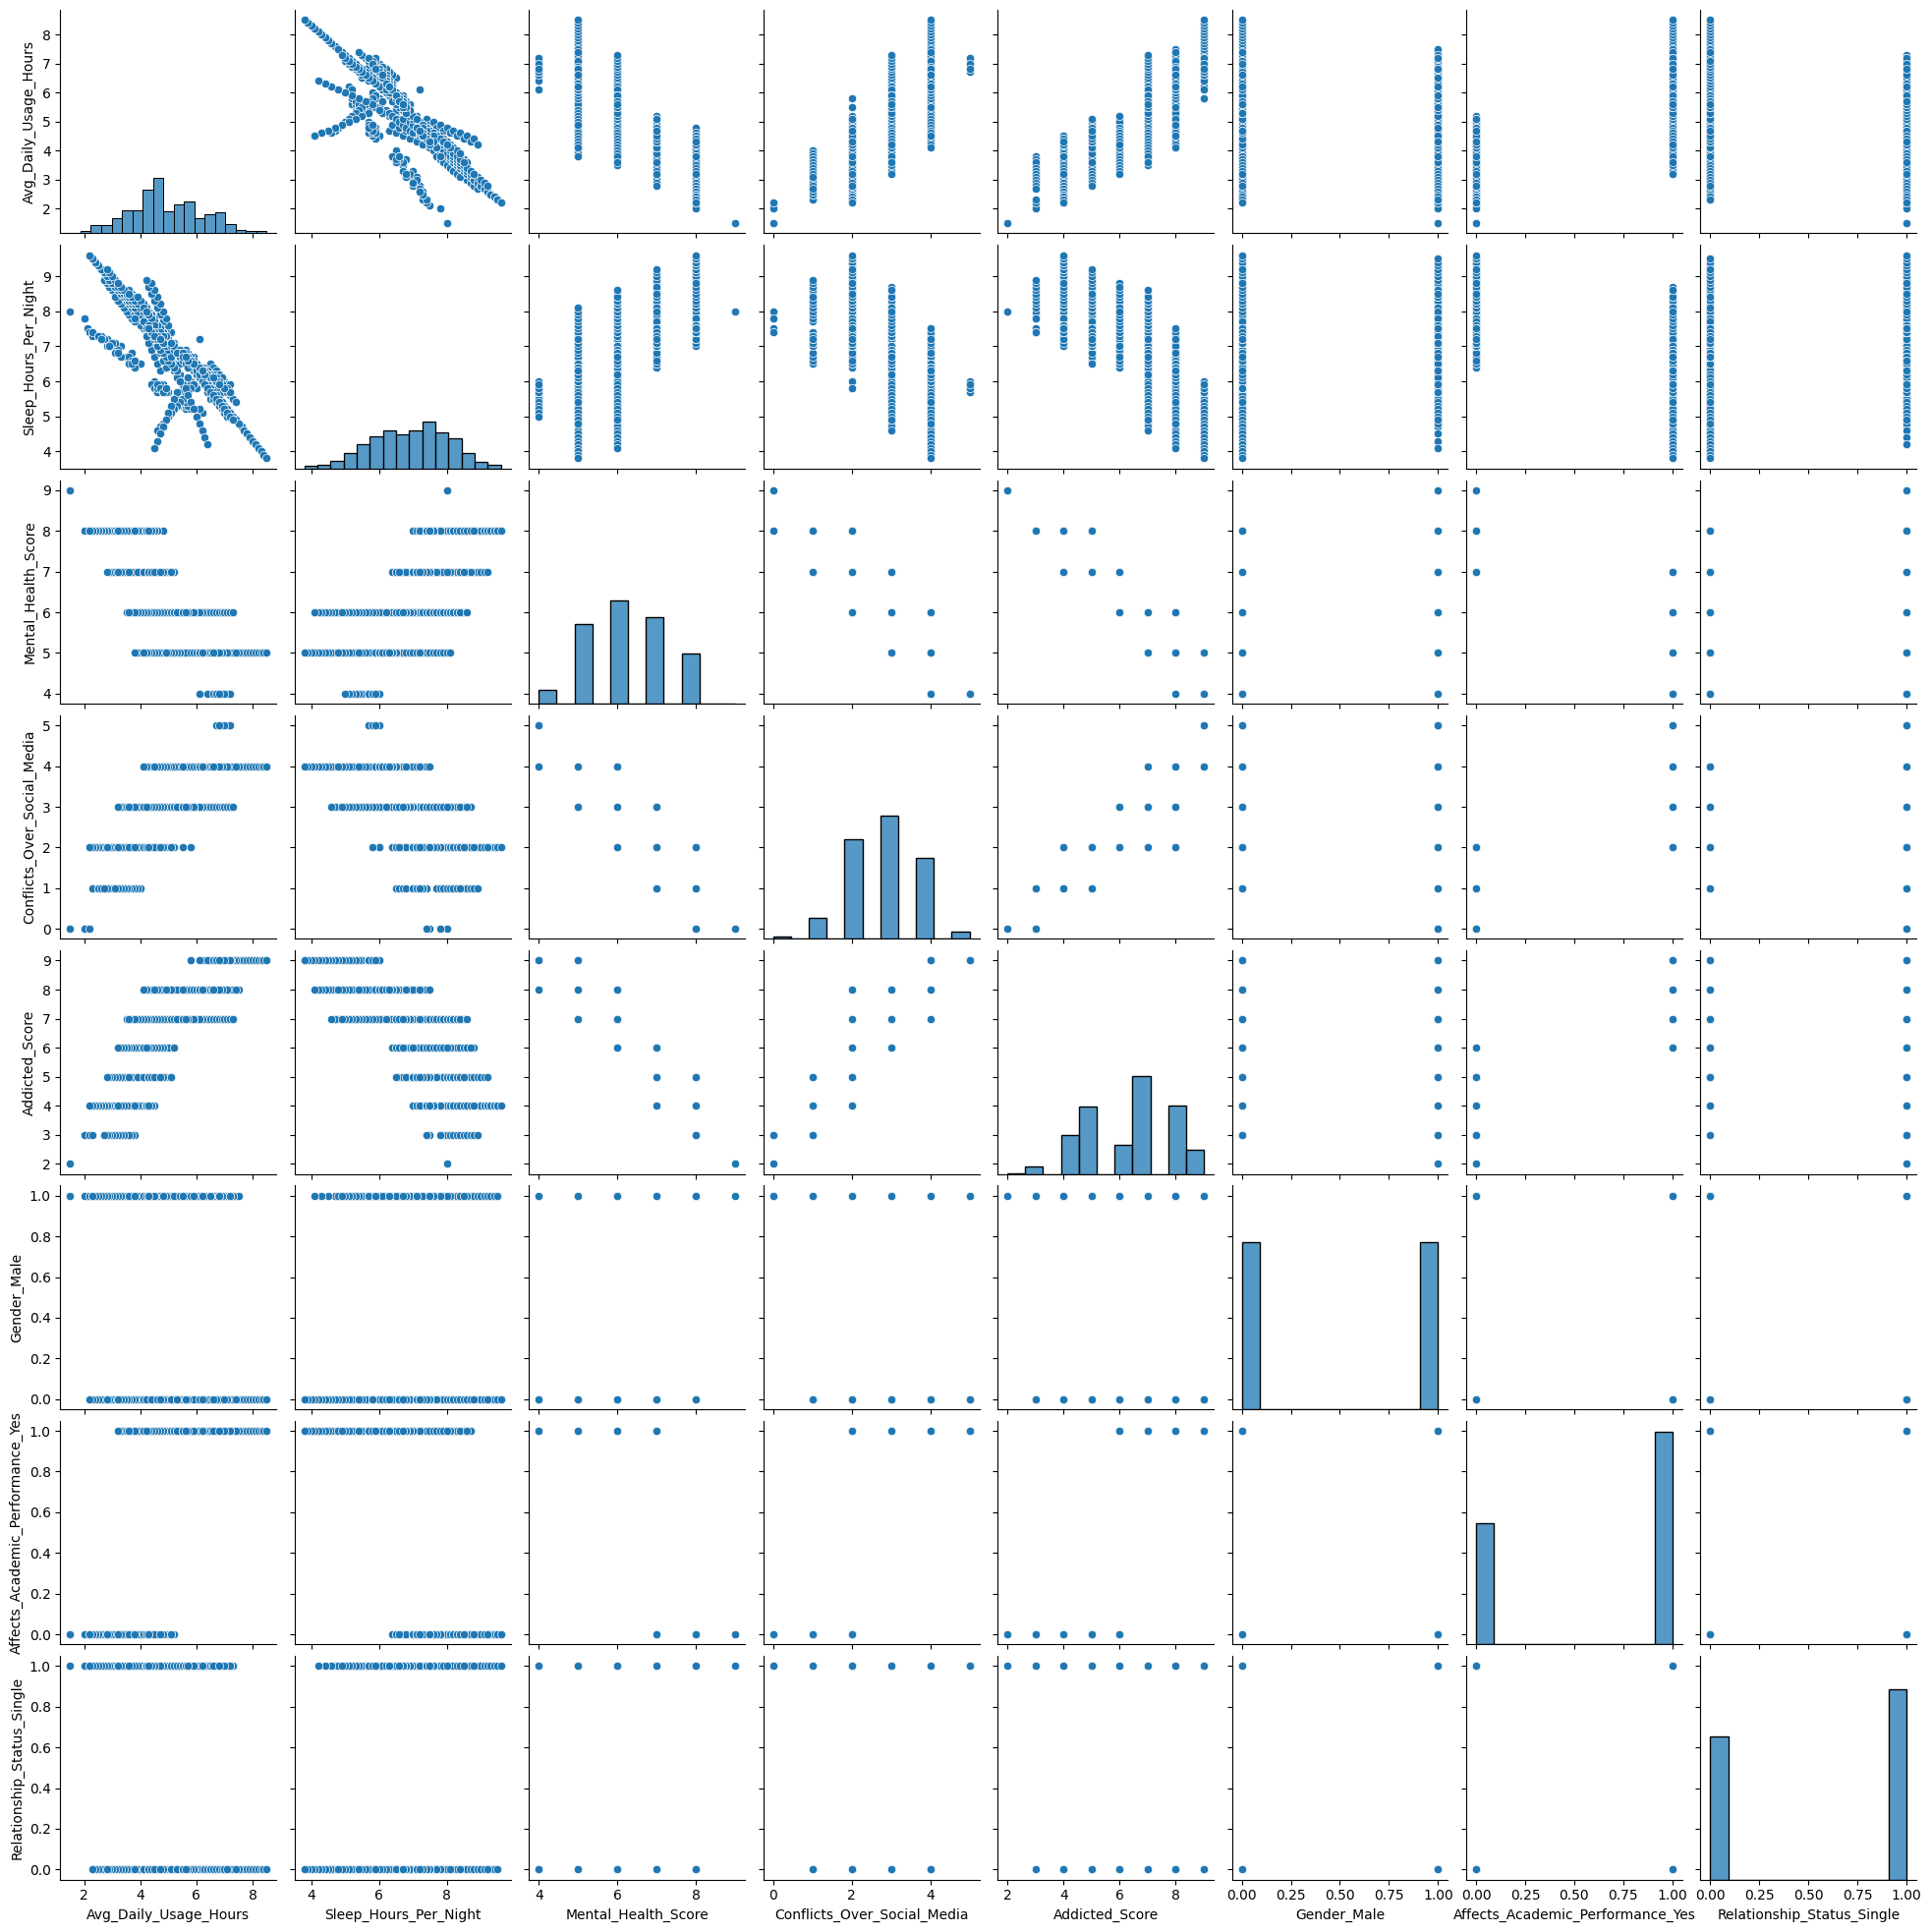

In [116]:
sns.pairplot(data=datasetSocialClean)

Reviewing the correlations and descriptions of values for each variable provide a strong outlook on the impact of social media on students.

Key observations:
- 'Avg_Daily_Usage_Hours' and 'Addicted_Score' show a strong positive correlation.
- 'Avg_Daily_Usage_Hours' is negatively correlated with 'Sleep_Hours_Per_Night'.
- 'Addicted_Score' is negatively correlated with 'Mental_Health_Score' and 'Sleep_Hours_Per_Night'.
- 'Affects_Academic_Performance_Yes' is positively correlated with 'Addicted_Score' and 'Avg_Daily_Usage_Hours'.
- 'Mental_Health_Score' is positively correlated with 'Sleep_Hours_Per_Night'.
- 'Conflicts_Over_Social_Media' is positively correlated with 'Addicted_Score' and 'Avg_Daily_Usage_Hours'.

These correlations suggest that higher social media usage and addiction scores are associated with less sleep, more conflicts, and lower mental health scores. In general, the higher the usage of social media, the more likely the student believes that it affects their academic performance as their health degrades noticeably. However, there is little to no correlation of the relationship status and gender with the other variables.

Going back from the potential questions that arised from the data processing section of the notebook:
* What variables affect the mental health score?

Variables with a positive correlation: 'Sleep_Hours_Per_Night'
Variables with a negative correlation: 'Avg_Daily_Usage_Hours', 'Conflicts_Over_Social_Media', 'Addicted_Score', and 'Affects_Academic_Performance_Yes'
Generally, mental health score is typically higher when students stay away from social media, are performing well in academics, and are getting plenty of rest.

* If women and men use social media with roughly the same amount of usage or online presence, would the mental health score, academic performance, relationship status, and sleep be different? Simply put, does social media affect specific genders differently? 

Gender of the student does not drastically change the impact of social media. Although it is plausible to assume that certain toxic concepts, such as beauty standards, are more prevalent on social media for specific genders, it also does not conclude any correlation as there are various variables unaccounted for, such as maturity and the number of followings.

* How difficult is it for a student to have good health, be academically successful, and maintain a relationship while having an online presence?

As online presence is inversely correlated to academic success and health, one might be considered an outlier in our dataset if they were to represent all of these characteristics. Moreover, the maintainence of a relationship has little to no correlation with other variables because of its lack of clarity within its implication. Relationships could either lead to more stress for the student, or give them a comforting partner to get them through work. Nonetheless, there is an unclear implication of being in a relationship with regards to mental health as a student.

This concludes the analysis of the dataset.

## Conclusion
The dataset looks into the impact of social media addiction on students. From the EDA, we can conclude prolonged use and addiction of social media tends to lead to lower mental health score, less sleep, affected academics, and more conflicts. To generalize unseen data accurately for this dataset, a linear regression algorithm can be used as the correlations are majorly linear. Furthermore, the model can be extended by adding more interaction or adding non-linearity. For further improvements to the processing of this dataset, the self-report bias must be acknowledged and various statistical tests can be included to draw reliable reasonings, such as the use of the spearman's correlation or drawing hypotheses.